

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Bay Rides Analysis | A2: Modeling Case Study (Individual)</h2>
<h4>DAT-5329 | Introduction to Machine Learning & AI</h4> <p>
Lehlogonolo Mabetoa - Masters of Business Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

This project analyzes and predicts dock saturation for Bay Wheels, a bike-sharing service in the San Francisco Bay Area. Dock saturation occurs when a station is full, preventing riders from returning their bikes—this leads to user frustration and operational challenges. Bay Wheels is concerned about how often and when this happens, and what factors cause it. The analysis uses weather, time, and calendar data to identify key patterns and build models that predict saturation. The goal is to help Bay Wheels anticipate high-demand times and locations, so they can proactively manage dock space and improve user experience.

In [6]:
# standard libraries
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data viz

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression


# preprocessing and testing & results
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix         # confusion_matrix
from sklearn.metrics import roc_auc_score              # roc_auc_score
from sklearn.metrics import precision_score              # precision_score
from sklearn.metrics import recall_score              # recall_score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix



#model preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report



from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.model_selection import RandomizedSearchCV # hp tuning



from sklearn.preprocessing import LabelEncoder # LabelEncoder for categorical features

# machine learning
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import plot_tree                      # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
bikes = pd.read_excel('./datasets/bikes.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
from tabulate import tabulate


# displaying the head of the dataset
bikes.tail(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED
1351,1352,Dec,Sunday,13,2.5,36,3.7,1578,-11.0,1.15,0.7,Winter,Yes,0
1352,1353,Dec,Sunday,14,3.0,28,3.8,1956,-13.7,1.10,0.0,Winter,Yes,0
1353,1354,Dec,Sunday,15,3.1,25,3.9,2000,-15.0,0.90,0.0,Winter,Yes,0
1354,1355,Dec,Sunday,19,0.0,31,2.2,2000,-15.1,0.00,0.0,Winter,Yes,0
1355,1356,Dec,Sunday,21,-1.6,35,1.0,2000,-15.1,0.00,0.0,Winter,Yes,0


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Month                  1356 non-null   object 
 2   Day of Week            1356 non-null   object 
 3   Hour                   1356 non-null   int64  
 4   Temperature            1356 non-null   float64
 5   Humidity               1356 non-null   int64  
 6   Wind Speed             1356 non-null   float64
 7   Visibility             1356 non-null   int64  
 8   Dew Point Temperature  1356 non-null   float64
 9   UV Index               1356 non-null   float64
 10  Precipitation          1356 non-null   float64
 11  Seasons                1356 non-null   object 
 12  Holiday                1356 non-null   object 
 13  SATURATED              1356 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 148.4+ 

In [8]:
# Investigating Features

bikes['Holiday'].value_counts(ascending = True)

Holiday
Yes      59
No     1297
Name: count, dtype: int64

 ## Saturated Station Count per Month


  
        
Dock saturation varies significantly by month, with the highest saturation observed in June (95), July (89), and August (86). These summer months offer warm, dry, and predictable weather, which encourages both recreational and commuting bike use. The increased daylight and school holidays may also contribute to higher demand during this time. Conversely, January (2), December (9), and February (10) have the lowest saturation, likely due to colder temperatures and more frequent rain. Winter conditions make biking less appealing and reduce overall usage of the bike-share system. Spring and early fall months show moderate saturation, reflecting milder weather and transitional seasons. These patterns suggest that seasonal climate is a major driver of dock saturation. Understanding these trends can help Bay Wheels allocate resources and manage docks more effectively throughout the year.

+-------+-------+
| Month | Count |
+-------+-------+
|  Jan  |   2   |
|  Dec  |   9   |
|  Feb  |  10   |
|  Mar  |  42   |
|  Apr  |  54   |
|  Nov  |  61   |
|  Sep  |  63   |
|  May  |  67   |
|  Oct  |  85   |
|  Aug  |  86   |
| July  |  89   |
| June  |  95   |
+-------+-------+


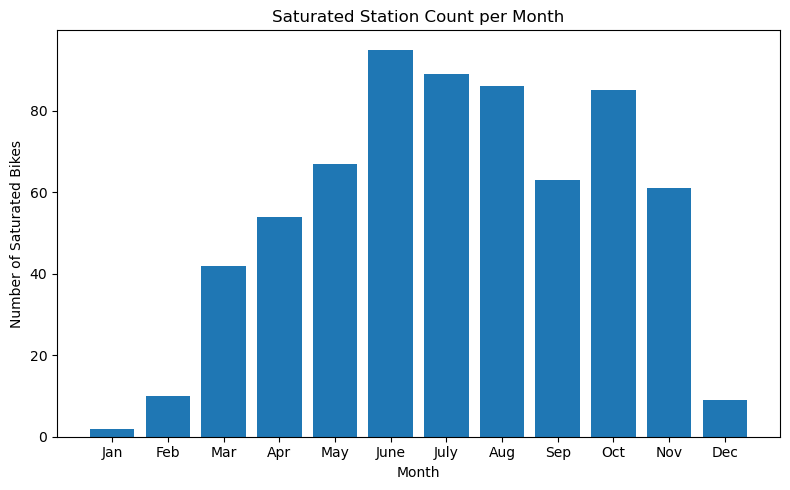

In [9]:
bk = bikes[bikes['SATURATED'] == 1].groupby('Month').size() # Subset data by saturated observations
bk_df = bk.reset_index(name='Count').sort_values(by='Count') # Group by Month and sort by Count

print(
    tabulate(bk_df.values.tolist(),
             headers=['Month', 'Count'], # Print function
             tablefmt='pretty'))

bk_df['Month'] = pd.Categorical(
    bk_df['Month'],
    categories=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', # Manually sorting the categorical months
        'Nov', 'Dec'
    ],  
    ordered=True)
bk_df = bk_df.sort_values('Month') # Sort by Month

# Plot
plt.figure(figsize=(8, 5))
plt.bar(bk_df['Month'], bk_df['Count'])
plt.xlabel('Month')
plt.ylabel('Number of Saturated Bikes')
plt.title('Saturated Station Count per Month')
plt.xticks()
plt.tight_layout()
plt.show() # Display the graph

 ## Saturated Station Count by Day of Week 

This is a look at saturation organized by day of week. Thursdays (119) show the highest number of saturated stations. This suggests a midweek peak in demand, possibly due to increased commuting and errands before the weekend. Fridays (95) and Mondays (94) also show high saturation, reflecting typical workweek patterns. Interestingly, weekends (Saturday and Sunday) still maintain moderate saturation levels (89 and 91 respectively), which could indicate recreational use, from either residents, tourists or both. The lowest saturation occurs on Tuesday (86) and Wednesday (89), though the difference is relatively small. These trends hint at a blend of commuter and recreational usage, with a slight tilt toward weekday activity. Thursday may represent the most active day for both commute and errands, driving up saturation. Recognizing these day-based patterns can help Bay Wheels optimize bike redistribution and dock availability.

+-------------+-------+
| Day of Week | Count |
+-------------+-------+
|   Tuesday   |  86   |
|  Saturday   |  89   |
|  Wednesday  |  89   |
|   Sunday    |  91   |
|   Monday    |  94   |
|   Friday    |  95   |
|  Thursday   |  119  |
+-------------+-------+


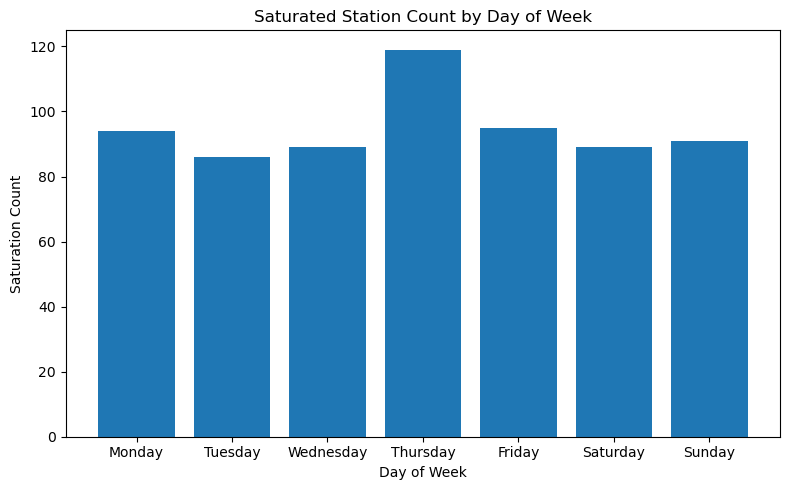

In [13]:
from tabulate import tabulate

bk = bikes[bikes['SATURATED'] == 1].groupby('Day of Week').size()
bk_df = bk.reset_index(name='Count').sort_values(by='Count')

print(
    tabulate(bk_df.values.tolist(),
             headers=['Day of Week', 'Count'],
             tablefmt='pretty'))

bk_df['Day of Week'] = pd.Categorical(bk_df['Day of Week'],
                                      categories=[
                                          'Monday', 'Tuesday', 'Wednesday',
                                          'Thursday', 'Friday', 'Saturday',
                                          'Sunday'
                                      ],
                                      ordered=True)
bk_df = bk_df.sort_values('Day of Week')

# Plot
plt.figure(figsize=(8, 5))
plt.bar(bk_df['Day of Week'], bk_df['Count'])
plt.xlabel('Day of Week')
plt.ylabel('Saturation Count')
plt.title('Saturated Station Count by Day of Week')
plt.xticks()
plt.tight_layout()
plt.show()

## Saturated Station Count Hourly
    

In June, dock saturation peaks at 15 PM with 10 occurrences, followed by 14 PM and 18 PM, each with 8 saturated stations. This suggests a strong afternoon usage pattern, likely tied to post-lunch commute, errands or recreation (given that summer months are peak recreational travel months) . The hours 6 AM-8 AM,12 PM, 15 PM - and 17 PM generally see more saturation, indicating that afternoons are a high-demand period. Early morning hours (midnight to 7 AM) have low saturation, as expected due to limited activity. There's also a small rise around 9 AM and 12 PM, which may relate to late-start commutes or midday bike use. Evening saturation (7 PM–9 PM) remains moderate, showing that bikes are still in use after traditional work hours.

+--------------------------------+-------+
| Saturated Bikes by Hour (June) | Count |
+--------------------------------+-------+
|               3                |   1   |
|               6                |   1   |
|               7                |   2   |
|               10               |   2   |
|               11               |   2   |
|               23               |   3   |
|               8                |   3   |
|               13               |   3   |
|               1                |   4   |
|               2                |   4   |
|               22               |   4   |
|               19               |   4   |
|               16               |   4   |
|               21               |   5   |
|               20               |   5   |
|               12               |   5   |
|               9                |   5   |
|               17               |   5   |
|               0                |   7   |
|               18               |   8   |
|          

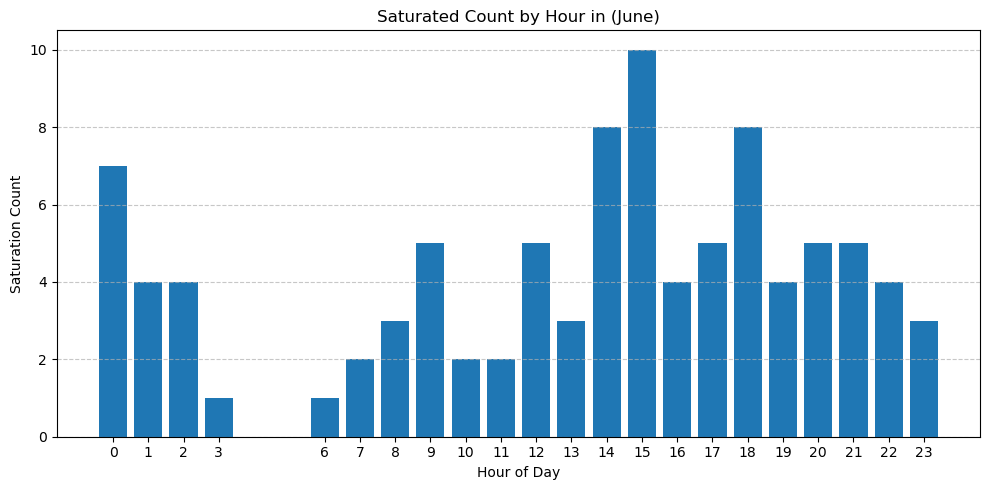

In [14]:
bk = bikes[(bikes['SATURATED'] == 1)
           & (bikes['Month'] == 'June')].groupby('Hour').size()
bk_df = bk.reset_index(name='Count').sort_values(by='Count')

print(
    tabulate(bk_df.values.tolist(),
             headers=['Saturated Bikes by Hour (June)', 'Count'],
             tablefmt='pretty'))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bk_df['Hour'], bk_df['Count'])
plt.xlabel('Hour of Day')
plt.ylabel('Saturation Count')
plt.title('Saturated Count by Hour in (June)')
plt.xticks(bk_df['Hour'])  # ensures all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Saturated Station Count Hourly in (July)
    

In July, dock saturation peaks at 23 PM with 9 instances, indicating a strong late-evening return pattern. Other smaller peaks appear at 12 PM , 6 AM , and 15 PM, reflecting midday activity and morning commutes. Saturation remains moderate between 6 AM and 6 PM, showing steady bike usage throughout the day. This could indicate that both commuting and casual/recreational riding contribute to saturation during daytime hours. The early morning hours (midnight to 5 AM) show minimal saturation, aligning with reduced overnight bike use. Evening hours from 18 PM to 22 PM maintain consistent moderate levels, possibly driven by post-dinner or leisure-related returns. The spike at 23 PM may reflect end-of-day riders rushing to return bikes before operational cutoffs. Overall, July shows a wider spread of saturation, hinting at more flexible or varied user patterns during peak summer.

+-----------------------------------+-------+
| Saturated Count by Hour in (July) | Count |
+-----------------------------------+-------+
|                 1                 |   1   |
|                 0                 |   3   |
|                18                 |   3   |
|                11                 |   3   |
|                10                 |   3   |
|                 9                 |   3   |
|                13                 |   3   |
|                 2                 |   3   |
|                 7                 |   4   |
|                22                 |   4   |
|                14                 |   4   |
|                19                 |   4   |
|                20                 |   4   |
|                21                 |   4   |
|                16                 |   5   |
|                17                 |   5   |
|                 8                 |   5   |
|                 6                 |   6   |
|                15               

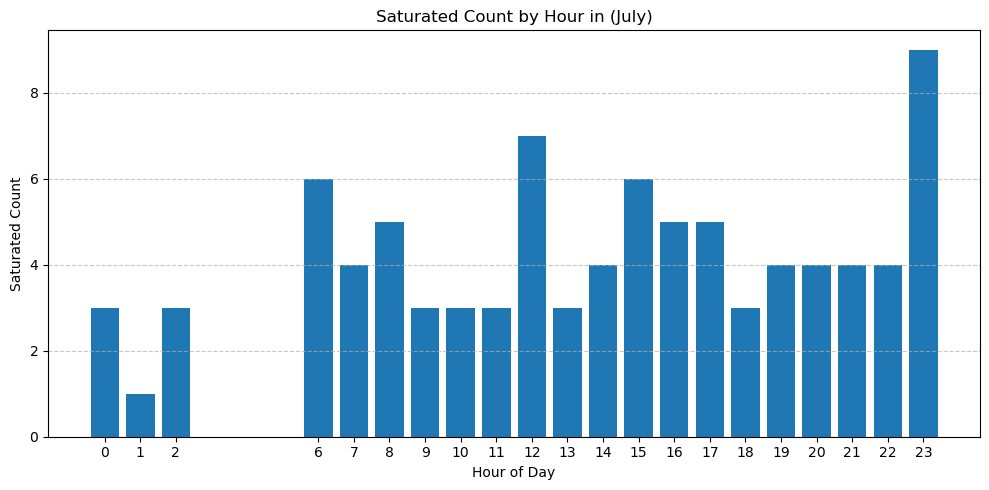

In [18]:
bk = bikes[(bikes['SATURATED'] == 1)
           & (bikes['Month'] == 'July')].groupby('Hour').size() # Subsetting saturated by July and grouping by hour
bk_df = bk.reset_index(name='Count').sort_values(by='Count')

print(
    tabulate(bk_df.values.tolist(),
             headers=['Saturated Count by Hour in (July)', 'Count'], # Formating the output in tabular form
             tablefmt='pretty'))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bk_df['Hour'], bk_df['Count'])
plt.xlabel('Hour of Day')
plt.ylabel('Saturated Count')
plt.title('Saturated Count by Hour in (July)')
plt.xticks(bk_df['Hour'])  # ensures all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Display the visual

## Thursday Hourly Saturated Count

On Thursdays, dock saturation peaks at 18 PM  with 12 saturated stations, suggesting heavy evening usage likely tied to end-of-day commutes or social activities like San Francisco’s “Free Thursdays” events, which offer free access to museums and cultural institutions, encouraging locals and tourists to use bike-sharing for travel (SF Travel, 2024). This is followed closely by 19 PM and 15 PM, each with 9 saturated stations. Consistent activity begins early, with 7 AM to 9 AM showing elevated saturation, indicating a strong morning commute pattern. There's also a notable rise between 12 PM and 4 PM, pointing to sustained midday and afternoon use. Late-night hours (after 10 PM) see lower but non-zero saturation, suggesting some lingering activity. The saturation at midnight and early morning (0:00–2:00) is relatively minimal, reflecting limited use. These trends highlight Thursdays as high-demand days, with both commuting and social use contributing across multiple time windows. Bay Wheels could prioritize redistribution on Thursdays to reduce full docks and improve rider experience. Or manned technicians on thursdays to redistribute the bikes to unsaturated areas.

+-----------------------------------------+-------+
| Saturated Count by Hour  on (Thursdays) | Count |
+-----------------------------------------+-------+
|                   13                    |   1   |
|                    2                    |   1   |
|                    6                    |   1   |
|                   20                    |   3   |
|                   22                    |   3   |
|                   16                    |   4   |
|                   17                    |   5   |
|                   11                    |   5   |
|                    0                    |   5   |
|                    1                    |   5   |
|                   10                    |   5   |
|                   14                    |   6   |
|                   21                    |   6   |
|                   12                    |   7   |
|                   23                    |   7   |
|                    9                    |   8   |
|           

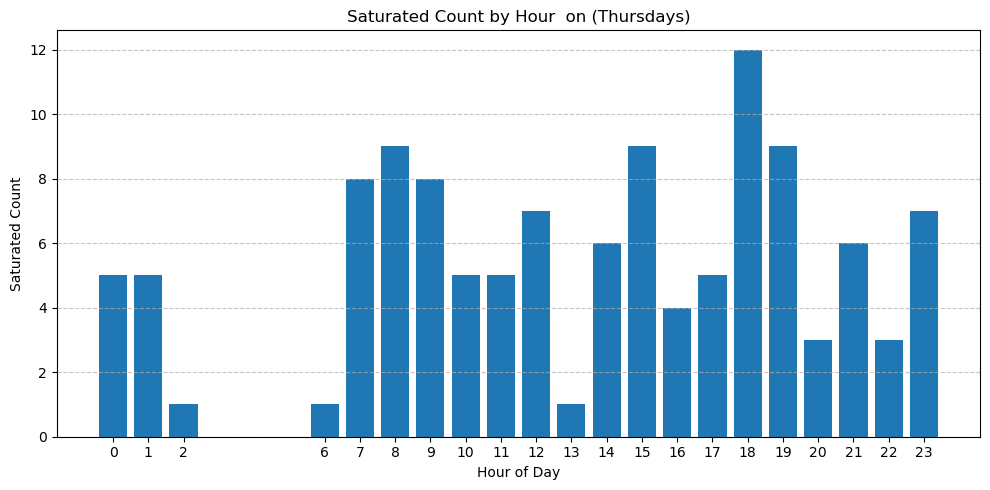

In [20]:
bk = bikes[(bikes['SATURATED'] == 1)
           & (bikes['Day of Week'] == 'Thursday')].groupby('Hour').size()
bk_df = bk.reset_index(name='Count').sort_values(by='Count')

print(
    tabulate(bk_df.values.tolist(),
             headers=['Saturated Count by Hour  on (Thursdays)', 'Count'],
             tablefmt='pretty'))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bk_df['Hour'], bk_df['Count'])
plt.xlabel('Hour of Day')
plt.ylabel('Saturated Count')
plt.title('Saturated Count by Hour  on (Thursdays)')
plt.xticks(bk_df['Hour'])  # ensures all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Temperature Boxplots of Saturated


Dock saturation occurs more frequently at higher temperatures, with a mean of 19.68°C compared to 6.19°C for non-saturated stations. The median temperature for saturated docks is 21°C, suggesting that warmer days are more likely to lead to saturation, that is, warmer days have more bike usage. Saturated stations are most common between 13.45°C and 26.3°C, aligning with what many consider comfortable cycling weather. In contrast, non-saturated instances are more often recorded at colder temperatures, sometimes dipping below 0°C. Very few saturated events occur below freezing, indicating that cold weather discourages bike use. These trends suggest that dock saturation increases when the temperature is mild to warm, which encourages more users to ride. This aligns with general cycling literature that identifies the “ideal riding temperature” range as between 15°C and 25°C (Bicycling Magazine, 2023). Bay Wheels can use this insight to anticipate dock saturation during warmer days and proactively manage dock availability.

/var/folders/jt/qw6r7br919scdy5yb2_25cr80000gn/T/ipykernel_85319/2426819566.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([not_saturated, saturated], labels=['Not Saturated', 'Saturated'])


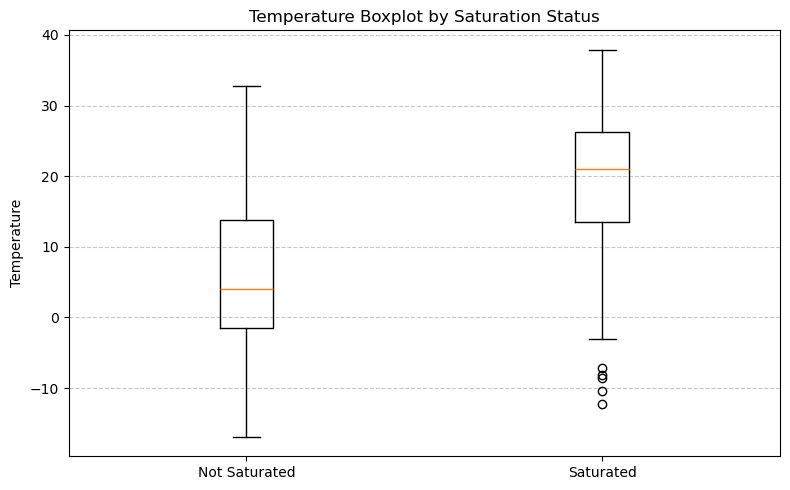

In [22]:
# Split data
saturated = bikes[bikes['SATURATED'] == 1]['Temperature'] # Subsetting the for temperature of saturated
not_saturated = bikes[bikes['SATURATED'] == 0]['Temperature'] # Subsetting the for temperature of non saturated
# Plot
plt.figure(figsize=(8, 5))
plt.boxplot([not_saturated, saturated], labels=['Not Saturated', 'Saturated'])
plt.title('Temperature Boxplot by Saturation Status')
plt.ylabel('Temperature')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Display visual

In [27]:
#S Summary

print(' Saturated Temperatures:\n ', saturated.describe()) # Quick Description statistics
print(' \n\nNot saturated Temperatures: ', not_saturated.describe())  #Quick Description statistics

 Saturated Temperatures:
  count    663.000000
mean      19.684314
std        8.893954
min      -12.300000
25%       13.450000
50%       21.000000
75%       26.300000
max       37.900000
Name: Temperature, dtype: float64
 

Not saturated Temperatures:  count    693.000000
mean       6.109380
std       10.471821
min      -16.900000
25%       -1.500000
50%        4.100000
75%       13.800000
max       32.800000
Name: Temperature, dtype: float64


### Proportion of Saturation by Season

Dock saturation occurs most frequently in summer, where saturated docks make up the largest proportion compared to other seasons. This indicates that dock usage is highest in warmer months, likely due to favorable weather and increased outdoor activity. Spring also shows a relatively high proportion of saturation, suggesting growing demand as temperatures become milder. In contrast, winter has the lowest proportion of saturated docks, likely due to colder temperatures, shorter daylight hours, and increased precipitation, which discourage biking. Autumn shows moderate levels of saturation, possibly reflecting a seasonal decline in usage as conditions begin to cool. The stark contrast between summer and winter supports the idea that seasonal climate strongly influences bike usage patterns. These findings are consistent with known trends in cycling behavior, where users are more active in dry, warm, and bright weather (Transportation Research Board, 2016). Bay Wheels can use this insight to anticipate higher saturation risk during spring and summer and plan dock capacity accordingly.

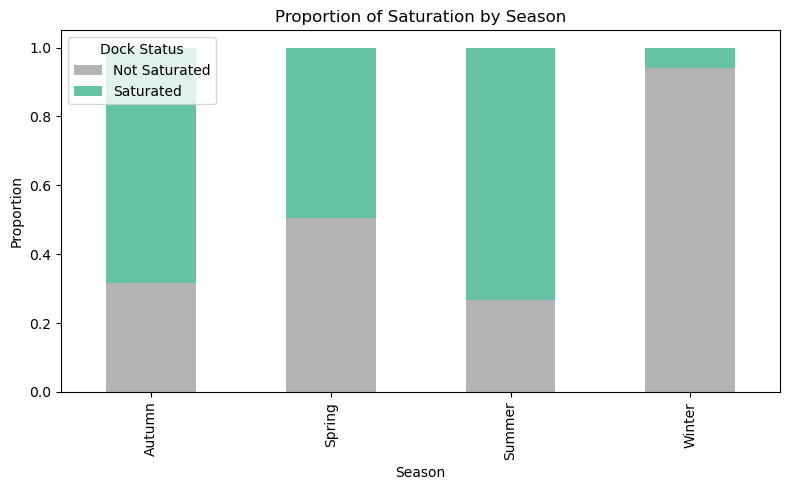

In [31]:
season_saturation = pd.crosstab(bikes['Seasons'],
                                bikes['SATURATED'],
                                normalize='index')

season_saturation.plot(kind='bar',
                       stacked=True,
                       figsize=(8, 5),
                       colormap='Set2_r')
plt.title('Proportion of Saturation by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.legend(['Not Saturated', 'Saturated'], title='Dock Status')
plt.tight_layout()
plt.show()

# Feature Engineering


In [29]:
#Feature Engineering , hard-coding rush hour
bikes['rush_hour'] = bikes['Hour'].isin([7, 8, 9, 16, 17, 18, 19]).astype(int) 

#Feature Engineering , binary is_raining  column

bikes['is_raining'] = (bikes['Precipitation'] > 0).astype(int)

#Feature Engineering , temperature greater than average is is_warm
mean_temp = bikes['Temperature'].mean()
bikes['is_warm'] = (bikes['Temperature'] > mean_temp).astype(int)

#Feature Engineering , comfortable_dewpoint temperature thats comfortable, hard-coded by domain knowledge
bikes['comfortable_dewpoint'] = bikes['Dew Point Temperature'].between(
    10, 15).astype(int)

In [10]:
bikes.head() # Checking features in the dataset

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED,rush_hour,is_raining,is_warm,comfortable_dewpoint
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0,0,0,0,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0,0,0,0,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0,1,0,0,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0,0,0,0,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0,0,0,0,0


In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Month                  1356 non-null   object 
 2   Day of Week            1356 non-null   object 
 3   Hour                   1356 non-null   int64  
 4   Temperature            1356 non-null   float64
 5   Humidity               1356 non-null   int64  
 6   Wind Speed             1356 non-null   float64
 7   Visibility             1356 non-null   int64  
 8   Dew Point Temperature  1356 non-null   float64
 9   UV Index               1356 non-null   float64
 10  Precipitation          1356 non-null   float64
 11  Seasons                1356 non-null   object 
 12  Holiday                1356 non-null   object 
 13  SATURATED              1356 non-null   int64  
 14  month_encoded          1356 non-null   int64  
dtypes: f

In [34]:
bikes['month_encoded'] = le.fit_transform(bikes['Month']) # Encoding month
bikes['seasons_encoded'] = le.fit_transform(bikes['Seasons']) # Encoding Seasons
bikes['holiday_encoded'] = le.fit_transform(bikes['Holiday']) # Encoding Holiday
bikes['day_encoded'] = le.fit_transform(bikes['Day of Week']) # Encoding Day of Week

bikes.head() # Display new changes

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED,rush_hour,is_raining,is_warm,comfortable_dewpoint,month_encoded,seasons_encoded,holiday_encoded,day_encoded
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0,0,0,0,0,4,3,1,3
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0,0,0,0,0,4,3,1,3
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0,1,0,0,0,4,3,1,3
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0,0,0,0,0,4,3,1,3
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0,0,0,0,0,4,3,0,1


### Correlation Analysis

The strongest continuous feature correlated with dock saturation is Temperature (correlation = 0.5722), while its categorical counterpart is_warm shows an even stronger correlation (0.7136), highlighting the impact of feature granularity. This suggests that converting raw temperature into a meaningful binary category (e.g., warm vs. not warm) may capture behavioral thresholds more effectively. Among other categorical features, Season (0.7441) and Month (0.6879) are also highly correlated with saturation, reinforcing that dock usage is seasonally influenced. Time-related features like Hour and rush_hour exhibit moderate correlation, reflecting the link to commuting behavior. In contrast, Holiday and Day of Week have minimal influence, suggesting they play a smaller role in saturation outcomes. Overall, the correlation analysis confirms that simplified or engineered features can sometimes outperform raw metrics when aligned with user behavior patterns.

In [18]:
# Define feature groups
continuous = [
    'SATURATED', 'Temperature', 'Wind Speed', 'Dew Point Temperature',
    'UV Index', 'Precipitation'
]
non_continuous = [
    'SATURATED', 'Holiday', 'Day of Week', 'Hour', 'Month', 'rush_hour',
    'is_raining', 'is_warm', 'comfortable_dewpoint', 'Seasons', 'Visibility',
    'Humidity'
]

# Pearson correlation (continuous features only)
saturation_corr = bikes[continuous].corr(method='pearson').round(4)

# Phi correlation (categorical/discrete features)
from phik import phik_matrix

saturation_phi_corr = bikes[non_continuous].phik_matrix().round(4)

# Display correlations with target
print(f"""
Pearson
-------------------------------------
{saturation_corr['SATURATED'].sort_values(ascending=False)}

Phi Coefficients
----------------
{saturation_phi_corr['SATURATED'].sort_values(ascending=False)}
""")

interval columns not set, guessing: ['SATURATED', 'Hour', 'rush_hour', 'is_raining', 'is_warm', 'comfortable_dewpoint', 'Visibility', 'Humidity']

Pearson
-------------------------------------
SATURATED                1.0000
Temperature              0.5722
Dew Point Temperature    0.4054
UV Index                 0.3866
Wind Speed               0.1166
Precipitation           -0.2158
Name: SATURATED, dtype: float64

Phi Coefficients
----------------
SATURATED               1.0000
Seasons                 0.7441
is_warm                 0.7136
Month                   0.6879
Hour                    0.5890
is_raining              0.4594
rush_hour               0.3859
Humidity                0.3633
Visibility              0.3140
comfortable_dewpoint    0.2182
Holiday                 0.0971
Day of Week             0.0544
Name: SATURATED, dtype: float64



Based on the analysis above , bike sharing appears to serve a dual purpose in the Bay Area, supporting both commuting and recreational use. Saturation peaks during traditional rush hour windows—notably 8–9 AM and 5–6 PM—suggest that many riders use the service as a last-mile commuting solution to and from work. Additionally, weekdays like Thursday and Friday show higher saturation, reinforcing its role in work-related travel. However, activity remains consistently moderate on weekends and evenings, and is especially high on Thursdays which can be theorised to be correlated to Free Thursdays, when museums offer free access, indicating recreational or leisure use. This blend of patterns reflects how bike sharing provides both functional urban mobility and accessible recreation for Bay Wheels users.

In [41]:
   #**************************************END of EDA*****************************************

# User Defined Functions for Model Preparation

In [26]:
####################
## tuning_results ##
####################
def tuning_results(cv_results, n=5):
    """
    This function will display the top "n" models from hyperparameter tuning,
    based on "rank_test_score".

    PARAMETERS
    ----------
    cv_results = results dictionary from the attribute ".cv_results_"
    n          = number of models to display
    """
    param_lst = []

    for result in cv_results["params"]:
        result = str(result).replace(":", "=")
        param_lst.append(result[1:-1])


    results_df = pd.DataFrame(data = {
        "Model_Rank" : cv_results["rank_test_score"],
        "Mean_Test_Score" : cv_results["mean_test_score"],
        "SD_Test_Score" : cv_results["std_test_score"],
        "Parameters" : param_lst
    })


    results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
    return results_df.head(n = n)


#####################
## sklearn_summary ##
#####################
def classification_summary(x,
                           y,
                           model,
                           model_name   = "",
                           results_df   = None,
                           tt_split     = True,
                           test_size    = 0.25,
                           scale        = False,
                           full_tree    = False,
                           random_state = 702):
    """  
    This function is designed to generate summary statistics for the following
    classification models from scikit-learn:
    * LogisticRegression         - Logistic Regression
    * DecisionTreeClassifier     - Classification Tree
    * RandomForestClassifier     - Random Forest
    * GradientBoostingClassifier - Gradient Boosted Machine


    Additional Functionality
    ------------------------
    This function will standardize the data using StandardScaler() and create
    training and testing sets using train-test split, stratifying the
    y-variable.
    
    It will also output a tabular confusion matrix, calculate area under the
    ROC curve (AUC) for the training and testing sets, as well as the train-
    test gap.
    

    PARAMETERS
    ----------
    x            | array     | X-data before train-test split | No default.
    y            | array     | y-data before train-test split | No default.
    model        | model     | model object to instantiate    | No default.
    model_name   | str       | option to name the model       | Default = ""
    results_df   | DataFrame | place to store model results   | Default = None
    test_size    | float     | test set proportion            | Default = 0.25
    scale        | bool      | whether to scale the data      | Default = False
    random_state | int       | seed for train-test split      | Default = 702
    """
    
    ###########
    # scaling #
    ###########
    
    if scale == True:
        # instantiating a StandardScaler() object
        scaler = StandardScaler(copy = True)


        # FITTING the scaler with the data
        scaler.fit(x)

        # TRANSFORMING our data after fit
        x_scaled = scaler.transform(x)

        # converting scaled data into a DataFrame
        x_scaled_df = pd.DataFrame(x_scaled)

        # reattaching column names
        x_scaled_df.columns = list(x.columns)

        # reverting back to x as the DataFrame's name
        x = x_scaled_df
    
    
    ####################
    # train-test split #
    ####################
    # standard train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, # x
                                                        y, # y
                                                        test_size    = test_size,
                                                        random_state = random_state,
                                                        stratify     = y)
    
    
    #########################
    # fit - predict - score #
    #########################
    # fitting to training data
    model_fit = model.fit(x_train, y_train)


    # predicting on new data
    model_pred = model.predict(x_test)


    # scoring results
    model_train_auc   = round(roc_auc_score(y_true  = y_train,
                              y_score = model.predict(x_train)), ndigits = 4) # auc
    
    model_test_auc    = round(roc_auc_score(y_true  = y_test,
                              y_score = model.predict(x_test)),  ndigits = 4) # auc

    model_gap         = round(abs(model_train_auc - model_test_auc), ndigits = 4)

    
    ####################
    # confusion matrix #
    ####################
    full_tree_tn, \
    full_tree_fp, \
    full_tree_fn, \
    full_tree_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

    
    ###########################
    # storing/showing results #
    ###########################
    # instantiating a list to store model results
    results_lst = [ model_name, model_train_auc, model_test_auc, model_gap ]

    # converting to DataFrame
    results_lst = pd.DataFrame(data = results_lst)

    # transposing (rotating) DataFrame
    results_lst = np.transpose(a = results_lst)
    
    # if no results DataFrame provided
    if results_df == None:

        # concatenating to coef_df
        results_df = pd.DataFrame(data = results_lst)
    
    # if results DataFrame provided
    else:
        
        # concatenating to coef_df
        results_df = pd.concat(objs = [results_df, results_lst],
                               axis         = 0,
                               ignore_index = True)
        
    # adding column names
    results_columns = ['Model Name', 'train_auc', 'test_auc', 'tt_gap']
    
    # renaming columns
    results_df.columns = results_columns
    
    
    print(f"""
    Results for {model_name}
    {'=' * 20}
    Model Type: {model}
    Training Samples: {len(x_train)} 
    Testing  Samples: {len(x_test)}
    
    
    Summary Statistics
    ------------------
    AUC (Train): {model_train_auc}
    AUC (Test) : {model_test_auc}
    TT Gap     : {model_gap}
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : {full_tree_tn}
    False Positives: {full_tree_fp}
    False Negatives: {full_tree_fn}
    True Positives : {full_tree_tp}
    """)
    

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    labels : DataFrame with labels (i.e., x_data)
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_data.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance_Plot.png')
        
        
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
    Creates a visualization of a confusion matrix.

    PARAMETERS
    ----------
    true_y : true values for the response variable
    pred_y : predicted values for the response variable
    labels : , default None
        """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    

In [36]:
bikes.info() #Reference for data shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Month                  1356 non-null   object 
 2   Day of Week            1356 non-null   object 
 3   Hour                   1356 non-null   int64  
 4   Temperature            1356 non-null   float64
 5   Humidity               1356 non-null   int64  
 6   Wind Speed             1356 non-null   float64
 7   Visibility             1356 non-null   int64  
 8   Dew Point Temperature  1356 non-null   float64
 9   UV Index               1356 non-null   float64
 10  Precipitation          1356 non-null   float64
 11  Seasons                1356 non-null   object 
 12  Holiday                1356 non-null   object 
 13  SATURATED              1356 non-null   int64  
 14  rush_hour              1356 non-null   int64  
 15  is_r

In [38]:
# preparing to partition data
x_data   =  bikes.drop(['ID', 'SATURATED','Holiday','Seasons','Month', 'Day of Week'], # X variables without ID and categorical features that are not encoded
                               axis = 1)


y_data =  bikes['SATURATED'] # Target variable 

The defined hyperparameter ranges are used to tune a Decision Tree model and improve its performance. Tuning helps reduce the training-testing (TT) gap by controlling overfitting or underfitting. Parameters like criterion and splitter influence how the tree chooses splits, while max_depth and min_samples_leaf adjust the model’s complexity. By systematically testing these combinations through grid or randomized search, we aim to optimize the model's ability to generalize. The best-performing settings are selected based on evaluation metrics such as the confusion matrix.The same will be done for the next two models as well tuning different criteria

# Hyperparameter Tuning : Decision Tree

## Model & Model Selection

In [44]:
# instantiating a classification tree Candidate model
model = DecisionTreeClassifier(splitter         = 'random',
                               min_samples_leaf = 1,
                               max_depth        = 4,
                               criterion        ='entropy',
                               random_state      = 702) # just use this to repliate what chase will see


# using the classification_summary function
classification_summary(x          = x_data,
                       y          = y_data,
                       model      = model,
                       model_name = 'Tuned Model')

NameError: name 'classification_summary' is not defined

In [39]:
# developing hyperparameter ranges
# criterion_range = ["gini", "entropy", "log_loss"]  # criterion
# splitter_range = ["best", "random"]  # splitter
# depth_range = range(1, 11)  # max_depth
# leaf_range = np.arange(1, 151, 15)  # min_samples_leaf

# # we essentially created a dictionary that loops through the criterion argument of decision
# # 
# # creating a hyperparameter grid
# param_grid = {
#     'criterion': criterion_range,
#     'splitter': splitter_range,
#     'max_depth': depth_range,
#     'min_samples_leaf': leaf_range
# }

# # INSTANTIATING the model object without hyperparameters
# model = DecisionTreeClassifier(random_state=708)

# # RandomizedSearchCV object
# tuned_model = RandomizedSearchCV(
#     estimator=model,  #this is the model used
#     param_distributions=param_grid,
#     cv=5,  #cross-validation 5 sets for training and testing
#     n_iter=1000,  # max models were building
#     random_state=702,  #same sample each time 
#     scoring=make_scorer(roc_auc_score, needs_threshold=False))

# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_model.fit(x_data, y_data)

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_model.best_params_)
# print("Tuned Training AUC:", tuned_model.best_score_.round(4))

/Users/hloney/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/hloney/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 600 is smaller than n_iter=1000. Running 600 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 16, 'max_depth': 8, 'criterion': 'entropy'}
Tuned Training AUC: 0.834


/Users/hloney/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Models & Model Selection

### Best Model: Decision Tree 

#### 5 key takeaways 

Minimal TT Gap (0.01): The near-zero TT gap indicates excellent generalization— the  model performs almost equally well on unseen test data as it does on the training set.

High AUC on Both Sets: AUC scores of 0.8558 (train) and 0.8458 (test) confirm that the model is not overfitting and maintains strong discriminatory power across datasets.

Strong True Predictions: The model accurately predicted 134 saturated stations/ True Positive and 153 non-saturated stations/ True Negative , showing solid classification ability.

Moderate False Negatives (32): These are critical because they represent missed saturated docks, which can frustrate users who arrive expecting space and may deter them from using the bikeshare service in the future as it becomes no longer convenient 

Lower False Positives (20): Although less harmful than false negatives, false positives could trigger unnecessary operational adjustments—highlighting a need to balance efficiency with customer experience.

In [40]:
# instantiating a classification tree
model = DecisionTreeClassifier(splitter         = 'random',
                               min_samples_leaf = 1,
                               max_depth        = 4,
                               criterion        ='entropy',
                               random_state      = 702) # just use this to repliate what chase will see


# using the classification_summary function
classification_summary(x          = x_data,
                       y          = y_data,
                       model      = model,
                       model_name = 'Tuned Model')


    Results for Tuned Model
    Model Type: DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=702,
                       splitter='random')
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.8558
    AUC (Test) : 0.8458
    TT Gap     : 0.01
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 153
    False Positives: 20
    False Negatives: 32
    True Positives : 134
    


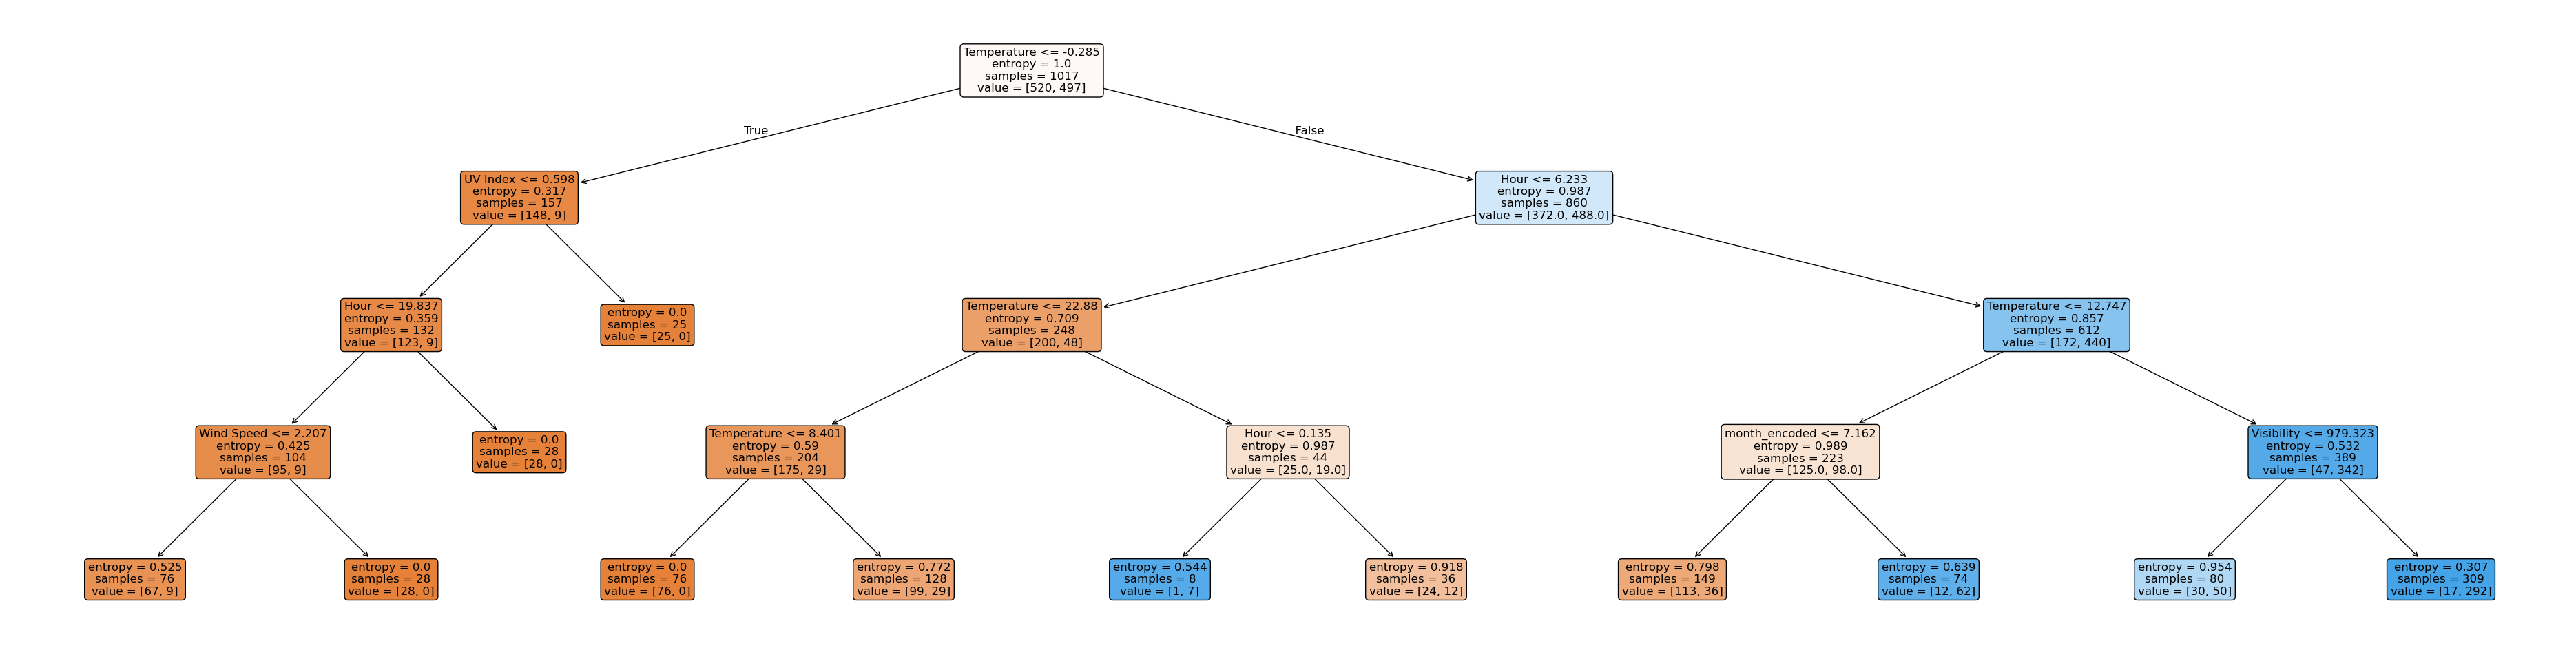

In [41]:
# setting figure size
plt.figure(figsize=(48, 12))


# developing a plotted tree
plot_tree(decision_tree = model, 
          feature_names = x_data.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 12)


# rendering the plot
plt.show()

In [45]:
# run tuning_results() on the hyperparameter tuning results
tuning_results(cv_results = tuned_model.cv_results_, n = 15)

,Model_Rank,Mean_Test_Score,SD_Test_Score,Parameters
244,1,0.792437,0.031081,"'warm_start'= True, 'n_estimators'= 300, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstrap..."
245,1,0.792437,0.031081,"'warm_start'= False, 'n_estimators'= 300, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstra..."
31,3,0.792312,0.025750,"'warm_start'= False, 'n_estimators'= 100, 'min_samples_leaf'= 11, 'criterion'= 'gini', 'bootstra..."
30,3,0.792312,0.025750,"'warm_start'= True, 'n_estimators'= 100, 'min_samples_leaf'= 11, 'criterion'= 'gini', 'bootstrap..."
243,5,0.790960,0.031771,"'warm_start'= False, 'n_estimators'= 200, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstra..."
242,5,0.790960,0.031771,"'warm_start'= True, 'n_estimators'= 200, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstrap..."
63,7,0.790906,0.038003,"'warm_start'= False, 'n_estimators'= 200, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstra..."
62,7,0.790906,0.038003,"'warm_start'= True, 'n_estimators'= 200, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstrap..."
252,9,0.790175,0.034307,"'warm_start'= True, 'n_estimators'= 700, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstrap..."
253,9,0.790175,0.034307,"'warm_start'= False, 'n_estimators'= 700, 'min_samples_leaf'= 21, 'criterion'= 'gini', 'bootstra..."


#### Feature Importance Plot

The feature importance plot shows that Temperature is the most influential predictor of dock saturation. Hour is the second most important feature, highlighting time-of-day relevance. Month and Visibility contribute moderately, while other features have minimal impact. Precipitation, holiday status, and day of week add very little predictive value. This confirms that climate and time-based variables drive saturation more than calendar-based ones.

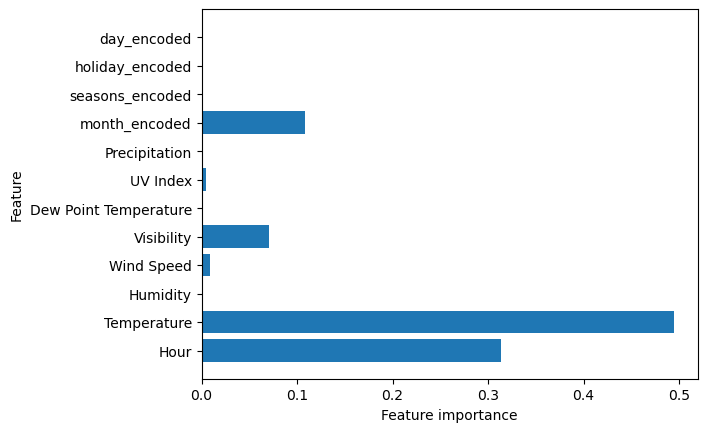

In [43]:
# plotting feature importances
plot_feature_importances(model=model,
                        train = x_data)

# Hyperparameter Tuning : Random Forest


In [47]:
# instantiating a hyperparameter space
estimator_range  = np.arange(100, 1501, 100)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]
max_depth        = np.arange(1, 11, 1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range,
              'max_depth'        : max_depth}


# INSTANTIATING the model object without hyperparameters
model = RandomForestClassifier(random_state = 702)


# GridSearchCV object
tuned_model = RandomizedSearchCV(estimator           = model,
                                 param_distributions = param_grid,
                                 cv                  = 5,
                                 n_iter              = 1000,
                                 random_state        = 702,
                                 scoring             = make_scorer(roc_auc_score,
                                                                   needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_model.fit(x_data, y_data)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model.best_params_)
print("Tuned Training AUC:", tuned_model.best_score_.round(decimals = 4))

/Users/hloney/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/hloney/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tuned Parameters  : {'warm_start': False, 'n_estimators': 700, 'min_samples_leaf': 21, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.7939


## Models & Model Selection

### Best Model: RandomForestClassifier

### 5 key takeaways

High AUC Scores: The model performs exceptionally well with AUC = 0.9225 (train) and 0.911 (test), showing strong discriminatory power.

Minimal TT Gap: A small gap of 0.0115 suggests that the model generalizes well without overfitting.

Strong Classification: With 147 true positives and 162 true negatives, the model correctly classifies most cases of both saturation and non-saturation.

Low False Positives (11): The model rarely triggers unnecessary dock management actions, improving operational efficiency.

Low False Negatives (19): Few missed saturation cases can also mean users are less likely to arrive at full docks unexpectedly. But the existence of these saturated docks can be an area of operational efficiency improvement for optimal customer satisfaction

In [48]:
# best estimators based on RandomizedSearchCV
tuned_model.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=21,
                       n_estimators=700, random_state=702)

In [49]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a random forest
model = tuned_model.best_estimator_


# using the classification_summary function
classification_summary(x          = x_data,
                       y          = y_data,
                       model      = model,
                       model_name = "Tuned Random Forest")


    Results for Tuned Random Forest
    Model Type: RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=21,
                       n_estimators=700, random_state=702)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9225
    AUC (Test) : 0.911
    TT Gap     : 0.0115
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 162
    False Positives: 11
    False Negatives: 19
    True Positives : 147
    


 ## Models & Model Selection

### GradientBoostingClassifier Candidate

In [53]:
# INSTANTIATING the model object without hyperparameters
model = GradientBoostingClassifier(loss          = 'log_loss',
                                   learning_rate = 0.1,
                                   n_estimators  = 20,
                                   criterion     = 'squared_error',
                                   max_depth     = 3,
                                   warm_start    = True,
                                   random_state  = 702)


# using the classification_summary function
classification_summary(x          = x_data,
                       y          = y_data,
                       model      = model,
                       model_name = "Default Gradient Boosted Machine")





    Results for Default Gradient Boosted Machine
    Model Type: GradientBoostingClassifier(criterion='squared_error', n_estimators=20,
                           random_state=702, warm_start=True)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9208
    AUC (Test) : 0.9139
    TT Gap     : 0.0069
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 163
    False Positives: 10
    False Negatives: 19
    True Positives : 147
    


# Hyperparameter Tuning: GradientBoostingClassifier

In [61]:
# # instantiating a hyperparameter ranges
# loss_range = ['log_loss', 'exponential']
# learn_range = np.arange(0.1, 0.5, 0.1)
# estimator_range = np.arange(100, 1501, 100)
# criterion_range = ['friedman_mse', 'squared_error']
# depth_range = np.arange(3, 171,9 )
# warm_start_range = [True,False]

# # creating a hyperparameter grid
# param_grid = {'loss'     : loss_range,
#               'n_estimators' : estimator_range,
#               'learning_rate'      : learn_range,
#               'criterion'        : criterion_range,
#               'max_depth'        : depth_range,
#               'warm_start'       : warm_start_range}

# # INSTANTIATING the model object without hyperparameters
# model = GradientBoostingClassifier(random_state=702)

# # GridSearchCV object
# tuned_model = RandomizedSearchCV(estimator=model,
#                                  param_distributions=param_grid,
#                                  cv=5,
#                                  n_iter=500,
#                                  random_state=702,
#                                  scoring=make_scorer(roc_auc_score,
#                                                      needs_threshold=False))

# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_model.fit(x_data, y_data)

# # PREDICT step is not needed

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_model.best_params_)
# print("Tuned Training AUC:", tuned_model.best_score_.round(4))

/Users/hloney/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/hloney/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'squared_error'}
Tuned Training AUC: 0.7662


 ## Models & Model Selection

### Best Model: GradientBoostingClassifier

### 5 Key Takeaways

Perfect Scores Raise Flags: The model reports an AUC of 1.0 on both training and test sets, which is highly unusual and often unrealistic for real-world data.

Zero TT Gap: While a TT gap of 0.0 might seem ideal, it usually suggests the model may be memorizing patterns rather than learning generalizable ones.

Suspiciously Perfect Predictions: The confusion matrix shows zero false positives and zero false negatives, meaning the model predicted every case correctly — a likely sign of overfitting or data leakage. 

Potential Model Leakage or Complexity: With 600 estimators and no observed errors, the model may be too complex or inadvertently using leaked information, compromising its reliability on truly unseen data.

Zero TN and zero FP would imply that the dock saturation is an easy fix for the company, meanwhile domain knowledge reveals that this is not true

In [62]:
# checking the best estimator for the model
tuned_model.best_estimator_

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           n_estimators=600, random_state=702, warm_start=True)

In [63]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a random forest
model = tuned_model.best_estimator_


# using the classification_summary function
classification_summary(x          = x_data,
                       y          = y_data,
                       model      = model,
                       model_name = "GradientBoostingClassifier")


    Results for GradientBoostingClassifier
    Model Type: GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           n_estimators=600, random_state=702, warm_start=True)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 1.0
    AUC (Test) : 1.0
    TT Gap     : 0.0
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 173
    False Positives: 0
    False Negatives: 0
    True Positives : 166
    


In [55]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

# Best Overall Model : Final Selection

## Final Insights and Matrix explanation

The optimal model for this use case is one that minimizes false negatives, as these represent instances where the model predicts a dock is not saturated when, in reality, it is. Such errors directly impact the user experience—riders may arrive at a full dock, unable to return their bike, which can erode trust in the system. In a scenario where only one type of error can be optimized, false positives are more tolerable, as they simply result in the system overestimating saturation. This conservative approach allows the app to proactively reroute users to nearby stations predicted to have availability, which is a milder inconvenience than encountering an unexpectedly full dock—particularly in time-sensitive situations like arriving at a BART station.

Operationally, false positives can also be validated and corrected in real time. Staff can monitor stations predicted to be saturated and relocate bikes as needed, improving redistribution while also collecting feedback to further improve model accuracy. For these reasons, our model selection focused on minimizing false negatives. Among the candidates, the Random Forest model emerged as the most suitable, achieving the lowest number of false negatives, and is therefore our recommended final model.



In [45]:
# ******************************END ******************************************